In [1]:
import os

os.environ["QUIMB_NUM_THREAD_WORKERS"] = "1"

import matplotlib.pyplot as plt
import numpy as np

import pandas as pd
import pickle

current_dir = os.getcwd()
grandparent_dir = os.path.abspath(os.path.join(current_dir, "../.."))

In [2]:
%config InlineBackend.figure_formats = ['svg']
import seaborn as sns
sns.set_palette('deep')
sns.set_style('whitegrid')
plt.rcParams.update({"font.size": 12})

In [48]:
diamond_results = pickle.load(
    open(
        os.path.join(
            grandparent_dir,
            "data",
            "SU4_opt",
            "SU4_results_diamond.pickle",
        ),
        "rb",
    )
)

In [49]:
results = {}
for key in diamond_results:
    naive_dists = [diamond_results[key]["single_SU4_stats"][i][0] for i in range(100)]
    opt_dists = [diamond_results[key]["single_SU4_stats"][i][1] for i in range(100)]
    results[key] = {"naive": naive_dists, "opt": opt_dists}

In [50]:
# RMSE of the different fits (regular and self-consistent)

for key, val in diamond_results.items():
    print(key)
    print(f'RMSE_U : {val["RMSE_U"]}, RMSE_SC : {val["RMSE_SC"]}')

cairo_SU4_03_10
RMSE_U : 0.010374347679316998, RMSE_SC : 0.00959356315433979
hanoi_SU4_08_01
RMSE_U : 0.02470879815518856, RMSE_SC : 0.020000340417027473
hanoi_SU4_10_10
RMSE_U : 0.027171919122338295, RMSE_SC : 0.026647841557860374
jakarta_SU4_07_01
RMSE_U : 0.01834329031407833, RMSE_SC : 0.013266567140817642
jakarta_SU4_18_10
RMSE_U : 0.028152622282505035, RMSE_SC : 0.007857410237193108
perth_SU4_07_01
RMSE_U : 0.012430978007614613, RMSE_SC : 0.009543179534375668
lagos_SU4_07_01
RMSE_U : 0.007724461145699024, RMSE_SC : 0.0068784900940954685
mumbai_SU4_03_10
RMSE_U : 0.04223041981458664, RMSE_SC : 0.02674998715519905


In [51]:
device_DF = pd.DataFrame(data=results)

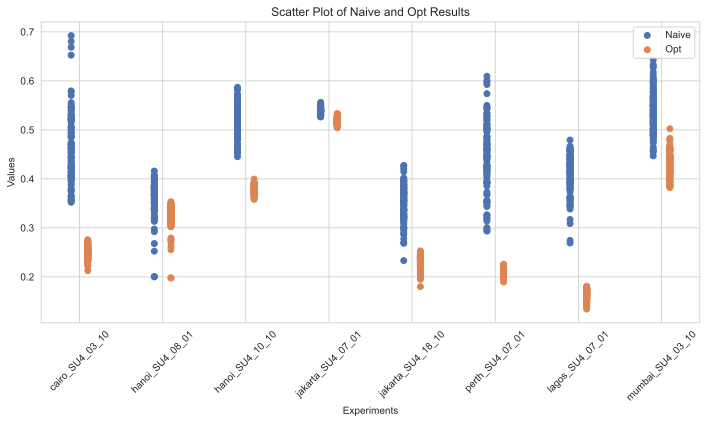

In [52]:
import matplotlib.pyplot as plt


# Preparing the data for plotting
experiment_names = list(results.keys())
x_values = range(len(experiment_names))
naive_values = [results[name]["naive"] for name in experiment_names]
opt_values = [results[name]["opt"] for name in experiment_names]

# Plotting
plt.figure(figsize=(10, 6))
for i, x in enumerate(x_values):
    # Offset for 'naive' and 'opt' points
    naive_x = [x - 0.1] * len(naive_values[i])  # Slight left offset
    opt_x = [x + 0.1] * len(opt_values[i])  # Slight right offset

    plt.scatter(naive_x, naive_values[i], color="C0", label="Naive" if i == 0 else "")
    plt.scatter(opt_x, opt_values[i], color="C1", label="Opt" if i == 0 else "")

# Adding labels and title
plt.xticks(x_values, experiment_names, rotation=45)
plt.ylabel("Values")
plt.xlabel("Experiments")
plt.title("Scatter Plot of Naive and Opt Results")
plt.legend()
plt.tight_layout()

# Display the plot
plt.show()

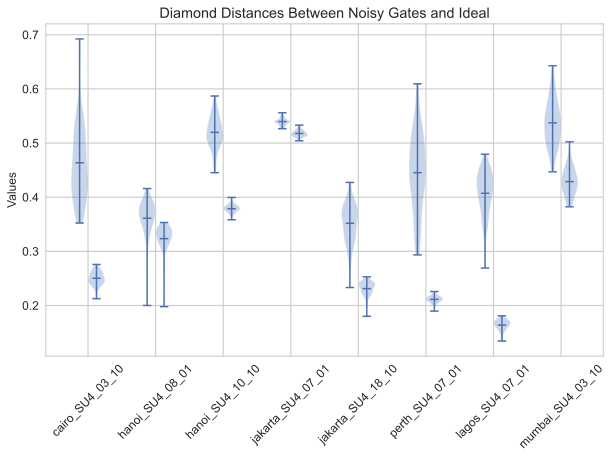

In [54]:
aw = 1.15
plt.rcParams["grid.linewidth"] = aw
plt.rcParams["axes.linewidth"] = aw  # Adjust the thickness here


# Preparing the data for plotting
positions = []
data = []
for i, exp in enumerate(results):
    data.append(results[exp]["naive"])
    data.append(results[exp]["opt"])
    positions.append(2 * i - 0.25)  # Position for 'naive'
    positions.append(2 * i + 0.25)  # Position for 'opt'

# Plotting
plt.figure(figsize=(10, 6))
plt.violinplot(data, positions=positions, showmeans=True)

plt.xticks(range(0, 2 * len(results), 2), list(results.keys()), rotation=45)

plt.ylabel("Values")
plt.title("Diamond Distances Between Noisy Gates and Ideal")

# plt.savefig("diamond_dist_SU4.pdf", bbox_inches="tight")